In [38]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

## 1. Исходные данные X ~ R(5, 15)

In [39]:
np.random.seed(42)

#Равномерное
a = 5
b = 15
n = 300
X = np.random.uniform(a, b, size = n)

In [40]:
#Характеристики случайных величин
m0 = 10
std = (((15-5)**2)/12)**(1/2)

#Выборочные характеристики
m = np.mean(X)

s = np.var(X, ddof=1)**(1/2)
s0 = (np.sum((X - m0)**2)/n)**(1/2)

(m0, std**2, std, m, s, s0)

(10,
 8.333333333333336,
 2.886751345948129,
 9.952045990934922,
 2.9434053948498935,
 2.9388868846932676)

## 2. Визуальное представление выборки

In [41]:
# Найдем NBins
int(1 + 1.3 * np.log(n))

8

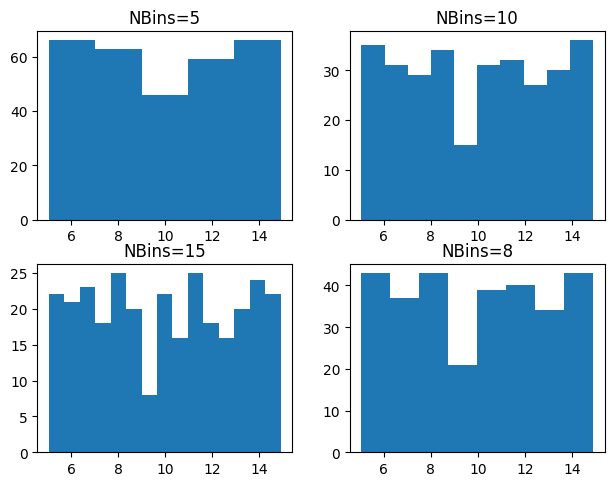

In [42]:
fig, ax = plt.subplots(nrows=2, ncols=2)
NBins = [5, 10, 15, 8]
i = 0
fig.tight_layout ()
for row in ax:
    for col in row:
        col.hist(X, bins=NBins[i])
        col.set(title=f'NBins={NBins[i]}')
        i += 1

plt.show();

## 3. Критерий хи-квадрат

In [43]:
alpha = 0.05

#### a) Статистическая гипотеза: H0: X ~ N(m, σ)

In [44]:
# Количество попаданий в интервал
def obs(x, a, b):
    n = 0
    for i in range(len(x)):
        if (x[i] > a) and (x[i] < b):
            n += 1
    return n

In [45]:
for nbins in NBins:
    intervals = np.linspace(a, b, nbins + 1)
    ni = []
    pi = []
    for i in range(nbins):
        ni.append(obs(X, intervals[i], intervals[i+1]))
        pi.append(st.distributions.norm(m, s).cdf(intervals[i+1]) - st.distributions.norm(m, s).cdf(intervals[i]))
    pi[0] += st.distributions.norm(m, s).cdf(intervals[0])
    pi[nbins-1] += 1 - st.distributions.norm(m, s).cdf(intervals[nbins])

    #Получили набор и ожидаемых вероятностей pi для N(m, s) и кол-ва попаданий из нашей выборки ni в каждой интервал
    z = np.sum([((x - y*n)**2)/(y*n) for x, y in zip(ni, pi)])
    p = 1 - st.distributions.chi2(nbins - 2 - 1).cdf(z)
    print('Nbins =', nbins, 'Статистика = ', z, 'p-value = ', p )
    print('C помощью st.chisquare:' , st.chisquare(ni, np.array(pi)*n, ddof=2))

Nbins = 5 Статистика =  27.309759657809032 p-value =  1.174251271884863e-06
C помощью st.chisquare: Power_divergenceResult(statistic=27.309759657809032, pvalue=1.1742512718717162e-06)
Nbins = 10 Статистика =  36.429051012348154 p-value =  6.015435562223281e-06
C помощью st.chisquare: Power_divergenceResult(statistic=36.429051012348154, pvalue=6.01543556223847e-06)
Nbins = 15 Статистика =  51.09145077875777 p-value =  8.975149191625675e-07
C помощью st.chisquare: Power_divergenceResult(statistic=51.09145077875777, pvalue=8.975149191641816e-07)
Nbins = 8 Статистика =  31.258531212914185 p-value =  8.328128080270503e-06
C помощью st.chisquare: Power_divergenceResult(statistic=31.258531212914185, pvalue=8.328128080267687e-06)


Как мы видим, гипотеза отклоняется для любого количества заданых интервалов.

#### б) Статистическая гипотеза: H0: X ~ R[loc, loc+scale]

In [46]:
scale = (12*(s**2))**(1/2)
loc = (2*m - scale)/2
print(loc, scale)

4.853918299782573 10.196255382304697


In [47]:
for nbins in NBins:
    intervals = np.linspace(a, b, nbins + 1)
    ni = []
    pi = []
    for i in range(nbins):
        ni.append(obs(X, intervals[i], intervals[i+1]))
        pi.append(st.distributions.uniform(loc, scale).cdf(intervals[i+1]) - st.distributions.uniform(loc, scale).cdf(intervals[i]))
    pi[0] += st.distributions.uniform(loc, scale).cdf(intervals[0])
    pi[nbins-1] += 1 - st.distributions.uniform(loc, scale).cdf(intervals[nbins])

    #Получили набор и ожидаемых вероятностей pi для R[loc, scale] и кол-ва попаданий из нашей выборки ni в каждой интервал
    z = np.sum([((x - y*n)**2)/(y*n) for x, y in zip(ni, pi)])
    p = 1 - st.distributions.chi2(nbins - 2 - 1).cdf(z)
    print('Nbins =', nbins, 'Статистика = ', z, 'p-value = ', p )
    print('C помощью st.chisquare:' , st.chisquare(ni, np.array(pi)*n, ddof=2))

Nbins = 5 Статистика =  2.5629751043941087 p-value =  0.2776240129256373
C помощью st.chisquare: Power_divergenceResult(statistic=2.5629751043941087, pvalue=0.2776240129256374)
Nbins = 10 Статистика =  9.574423864376064 p-value =  0.21400004375254955
C помощью st.chisquare: Power_divergenceResult(statistic=9.574423864376064, pvalue=0.21400004375254958)
Nbins = 15 Статистика =  12.196055962738347 p-value =  0.4300654381048461
C помощью st.chisquare: Power_divergenceResult(statistic=12.196055962738347, pvalue=0.43006543810484615)
Nbins = 8 Статистика =  10.035517067262836 p-value =  0.07423511815814099
C помощью st.chisquare: Power_divergenceResult(statistic=10.035517067262836, pvalue=0.07423511815814098)


Принимаем гипотезу

#### в) Статистическая гипотеза: H0: X ~ χ2(5)

In [48]:
for nbins in NBins:
    intervals = np.linspace(a, b, nbins + 1)
    ni = []
    pi = []
    for i in range(nbins):
        ni.append(obs(X, intervals[i], intervals[i+1]))
        pi.append(st.distributions.chi2(5).cdf(intervals[i+1]) - st.distributions.chi2(5).cdf(intervals[i]))
    pi[0] += st.distributions.chi2(5).cdf(intervals[0])
    pi[nbins-1] += 1 - st.distributions.chi2(5).cdf(intervals[nbins])
    #Получили набор и ожидаемых вероятностей pi для R[loc, scale] и кол-ва попаданий из нашей выборки ni в каждой интервал
    z = np.sum([((x - y*n)**2)/(y*n) for x, y in zip(ni, pi)])
    p = 1 - st.distributions.chi2(nbins - 1).cdf(z)
    print('Nbins =', nbins, 'Статистика = ', z, 'p-value = ', p )
    print('C помощью st.chisquare:' , st.chisquare(ni, np.array(pi)*n))

Nbins = 5 Статистика =  964.7940828810441 p-value =  0.0
C помощью st.chisquare: Power_divergenceResult(statistic=964.7940828810441, pvalue=1.5203052805857979e-207)
Nbins = 10 Статистика =  1155.3282884702378 p-value =  0.0
C помощью st.chisquare: Power_divergenceResult(statistic=1155.3282884702378, pvalue=5.327263788357726e-243)
Nbins = 15 Статистика =  1255.3989797765594 p-value =  0.0
C помощью st.chisquare: Power_divergenceResult(statistic=1255.3989797765594, pvalue=2.1228433645609857e-259)
Nbins = 8 Статистика =  1047.9759866815964 p-value =  0.0
C помощью st.chisquare: Power_divergenceResult(statistic=1047.9759866815964, pvalue=5.1725665160720294e-222)


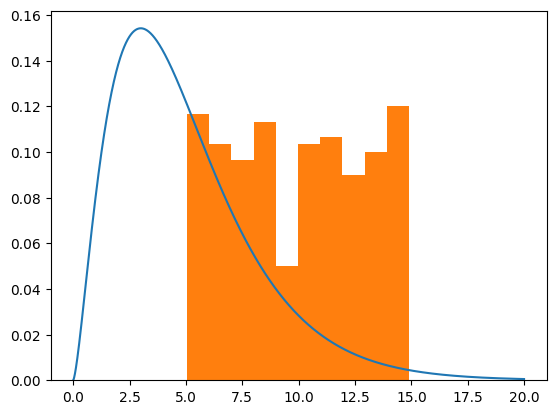

In [49]:
# Отклоняем гипотезу
x = np.arange (0, 20, 0.001)
plt.plot(x, st.distributions.chi2.pdf(x, df= 5 ))
plt.hist(X, weights=np.ones_like(X)/len(X));

## 4. Критерий Колмогорова

Будем считать,что истинное распределение неизвестно, тогда параметры теоретического было получено из выборки. Теоретическое: R[loc, loc + scale]

In [50]:
st.kstest(X, st.distributions.norm(m, s).cdf)

KstestResult(statistic=0.0779963153380337, pvalue=0.04923087193004616, statistic_location=8.253996981592678, statistic_sign=1)

In [51]:
st.kstest(X, st.distributions.uniform(loc, scale).cdf)

KstestResult(statistic=0.03398586079076449, pvalue=0.8670188001884968, statistic_location=8.75582952639944, statistic_sign=1)

In [52]:
st.kstest(X, st.distributions.chi2(5).cdf)

KstestResult(statistic=0.5947080248428217, pvalue=8.847647001227194e-102, statistic_location=5.841399649950488, statistic_sign=-1)

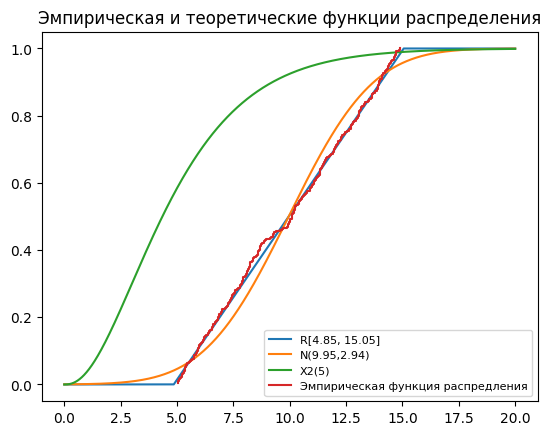

In [53]:
from statsmodels.distributions.empirical_distribution import ECDF

x = np.arange (0, 20, 0.001);
plt.title('Эмпирическая и теоретические функции распределения')
plt.plot(x, st.distributions.uniform.cdf(x, loc, scale), label=f'R[{round(loc, 2)}, {round(loc+scale, 2)}]')
plt.plot(x, st.distributions.norm.cdf(x, m, s), label=f'N({round(m,2)},{round(s, 2)})')
plt.plot(x, st.distributions.chi2.cdf(x, 5), label='X2(5)')
plt.step(ECDF(X).x, ECDF(X).y, label='Эмпирическая функция распредления')
plt.legend(fontsize=8, loc=4)
plt.show()


## 5. Двухвыборочные критерии


In [54]:
#Нормальное
m02 = 10
std2 = 5
n2 = 100
Y = np.random.randn(n2)*std2 + m02

In [55]:
#Выборочные характеристики
m2 = np.mean(Y)

s2 = np.var(Y, ddof=1)**(1/2)
s02 = (np.sum((Y - m02)**2)/n2)**(1/2)

(m02, std2**2, std2, m2, s2, s02)

(10, 25, 5, 10.349138877191153, 4.906395863923626, 4.8942712558007955)

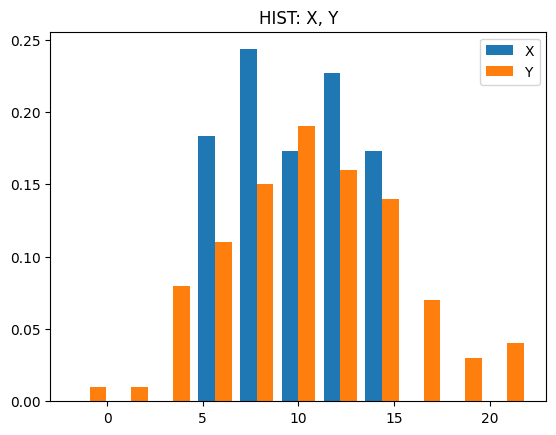

In [56]:
plt.title('HIST: X, Y')
x_w = np.empty(X.shape)
x_w.fill(1/X.shape[0])
y_w = np.empty(Y.shape)
y_w.fill(1/Y.shape[0])
bins = np.linspace(-2, 22, 12)

plt.hist([X, Y], bins, weights=[x_w, y_w], label=['X', 'Y'])[0]
plt.legend(loc='upper right')
plt.show()

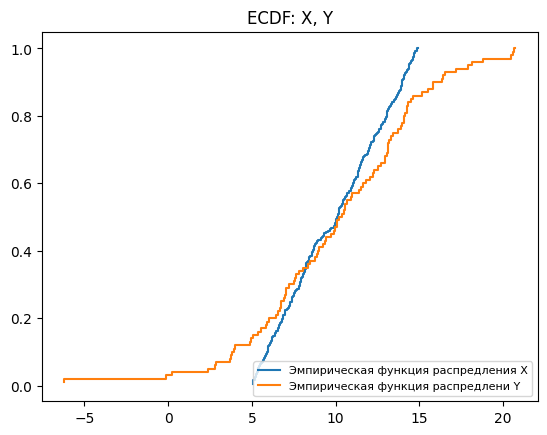

In [57]:
plt.title('ECDF: X, Y')
plt.step(ECDF(X).x, ECDF(X).y, label='Эмпирическая функция распредления X')
plt.step(ECDF(Y).x, ECDF(Y).y, label='Эмпирическая функция распредлени Y')
plt.legend(fontsize=8, loc=4)
plt.show()

#### 1)Реализуем двухвыборочный критерий Пирсона (two-sample chi-squared test)

In [58]:
def obs_two(X, Y, nbins):
    a = 5
    b = 15
    intervals = np.linspace(a, b, nbins + 1)
    niX, niY = [], []
    for i in range(nbins):
        niX.append(obs(X, intervals[i], intervals[i+1]))
        niY.append(obs(Y, intervals[i], intervals[i+1]))

    niX[0] += len(X[X < a])
    niX[nbins-1] += len(X[X > b])

    niY[0] += len(Y[Y < a])
    niY[nbins-1] += len(Y[Y > b])
    return (niX, niY)

In [59]:
nX, nY = obs_two(X, Y, 12)

In [60]:
def chi2(X, Y, nbins):
    nx = np.sum(X)
    ny = np.sum(Y)
    a = [  nx*ny*(((x/nx) - (y/ny))**2)/(x + y) for x, y in zip(*obs_two(X, Y, nbins))  ]
    return a

In [61]:
z = np.sum(chi2(X, Y, 12))
pv = 1 - st.distributions.chi2(9).cdf(z)
print(f'Статистика z = {z}, p-value = {pv}')
# отклоняем гипотезу

Статистика z = 22.342982137712454, p-value = 0.007853253964881679


#### 2)Двухвыборочный критерий Колмогорова (two-sample KS-test).

In [62]:
st.ks_2samp(X, Y)

KstestResult(statistic=0.15, pvalue=0.06490425277444577, statistic_location=14.900538501042632, statistic_sign=1)

#### 3)Sign test

In [63]:
# возьмем 100 точек из X
from statsmodels.stats.descriptivestats import sign_test
sign_test(X[:100], Y)

(-9.0, 0.08862608011406767)

#### 4)Критерий Манна-Уитни(U-test)

In [64]:
st.ranksums(X, Y)

RanksumsResult(statistic=-0.9278409228175176, pvalue=0.3534900928602841)